In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.transforms as mtransforms
import seaborn as sns
from scipy.stats.stats import pearsonr
import datetime as dt
from datetime import timedelta

plt.rc('font',family='Times New Roman',size=12)

In [4]:
class Time_list_month:
	def __init__(self, list_of_stock_prices):
		self.list_of_stock_prices = list_of_stock_prices

	def time_return(self):
		some_day = dt.datetime(year=1999, month=12, day=26)
		time = [] #зберігатиме число місяців, які пройшли з початку торгівлі
		for i in range(len(self.list_of_stock_prices)):
			some_day += timedelta(days=7)
			time.append(some_day)
			# print('{}'.format(self.list_of_stock_prices[i])+' '+str(time[i]))
		return time 

In [11]:
def correlation(name):
	prices_1 = pd.read_csv(name[0], index_col=0, parse_dates=True, na_values='.',infer_datetime_format=True,squeeze=True).fillna(method ='pad')
	index_name_0=''
	for j in range(len(name[0])-4):
		index_name_0 = index_name_0 + name[0][j]
	prices_1.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis='columns', inplace=True)
	weekly_return_1 = prices_1.pct_change(1)

	time = Time_list_month(prices_1['Close'])
	time = time.time_return()

	for i in range(1,len(name)):
		prices_2 = pd.read_csv(name[i], index_col=0, parse_dates=True, na_values='.',infer_datetime_format=True,squeeze=True).fillna(method ='pad')
		prices_2.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis='columns', inplace=True)
		weekly_return_2 = prices_2.pct_change(1)
		corr = weekly_return_1['Close'].rolling(40).corr(weekly_return_2['Close'])

		index_name = ''
		for j in range(len(name[i])-4):
			index_name = index_name + name[i][j]

		corr_1=[]
		p_list = []
		for s in range(40,len(weekly_return_1['Close'])):
			x = []
			y=[]
			for k in range(39,-1,-1):
				x.append(weekly_return_1['Close'][s-k])
				y.append(weekly_return_2['Close'][s-k])
			p_list.append(pearsonr(x,y)[1])
			corr_1.append(pearsonr(x,y)[0])

		max_corr = max(corr_1)
		min_corr = min(corr_1)

		p_list=np.array(p_list)
		time=np.array(time)
		for t in range(40):
			p_list= np.insert(p_list, 0, 'NaN', axis=0)

		p1 = plt.plot(time,p_list,color='navy',linewidth=0.5)
		plt.plot(time,p_list,color='navy', linewidth=0.5)
		plt.gcf().set_size_inches(8, 4)
		ax = plt.gca()
		ax.set_xlim(xmin=corr.index[0], xmax=corr.index[-1]) 
		p2 = ax.fill(np.NaN, np.NaN, 'r', alpha=0.3)
		plt.close()

		corr.plot(color='black', linewidth=1, marker='', figsize=(10, 4.5), legend=False)
        
		ax = plt.gca()  
		ax.set_xlim(xmin=corr.index[0], xmax=corr.index[-1])
		ax.set_ylabel('Кореляція (40w)')
		ax.set_xlabel('Дата')
		ax.set_title('Динаміка коефіцієнта кореляції (40w) '+index_name_0+'&'+index_name,size=17)
		ax.fill_between(time,min_corr,max_corr,where=corr<=-0.296,color='deepskyblue', alpha=0.5)
		p2 = ax.fill(np.NaN, np.NaN, 'deepskyblue', alpha=0.3)
		ax.fill_between(time,min_corr,max_corr,where=corr>=0.296,color='lime', alpha=0.5)
		p3 = ax.fill(np.NaN, np.NaN, 'lime', alpha=0.3)
		plt.legend((p3[0],p2[0], p1[0]), ('corr>=0.296','corr<=-0.296', 'corr'),loc=2,edgecolor='none')
		ax.spines["right"].set_visible(False)
		ax.spines["top"].set_visible(False)
        
		file_name = 'corr'+index_name_0+'&'+index_name
# 		plt.savefig(file_name)
		plt.show()
		plt.close()

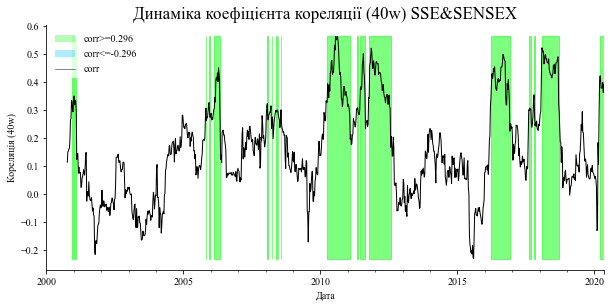

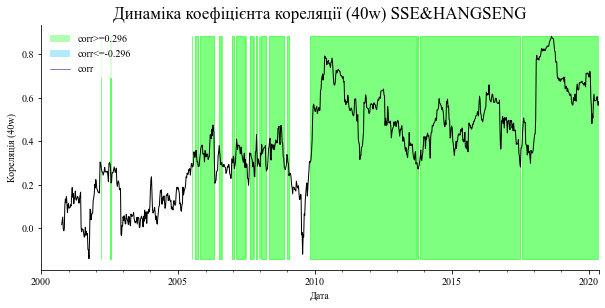

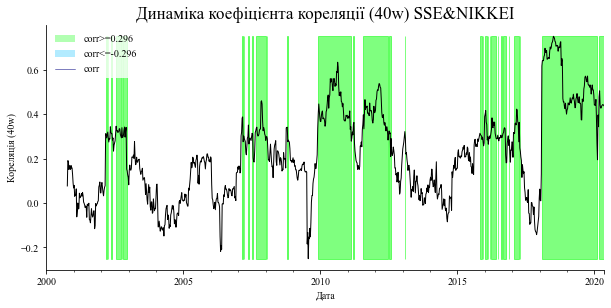

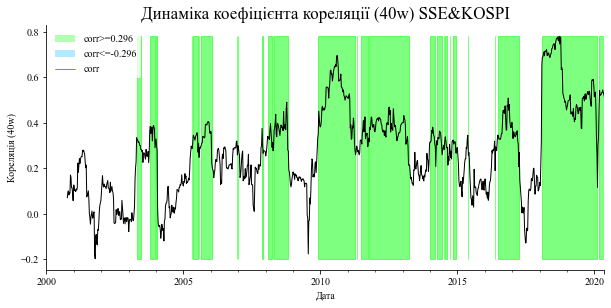

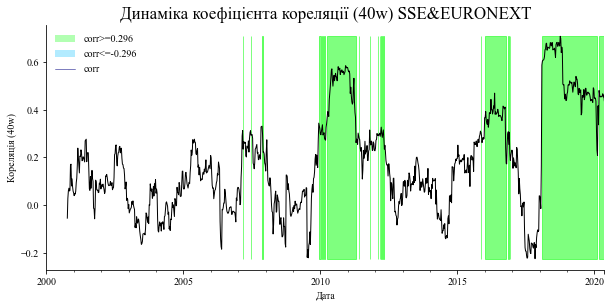

In [13]:
name=['SSE.csv','SENSEX.csv','HANGSENG.csv','NIKKEI.csv','KOSPI.csv','EURONEXT.csv']
correlation(name)

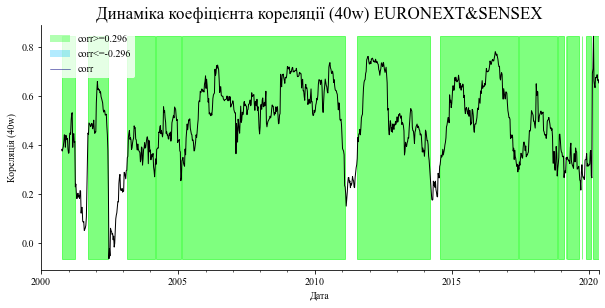

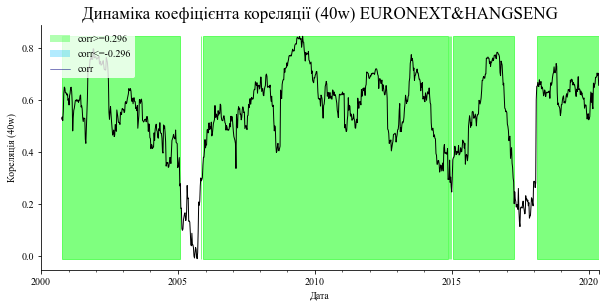

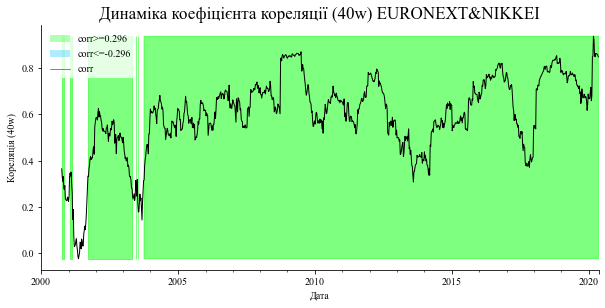

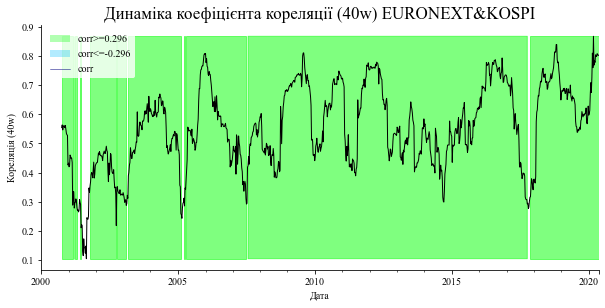

In [14]:
name = ['EURONEXT.csv', 'SENSEX.csv','HANGSENG.csv','NIKKEI.csv','KOSPI.csv']
correlation(name)

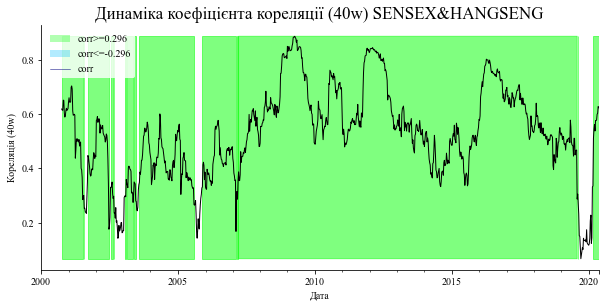

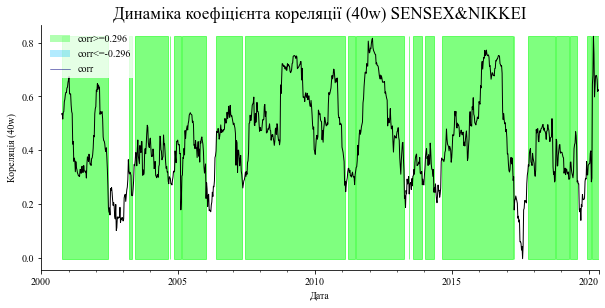

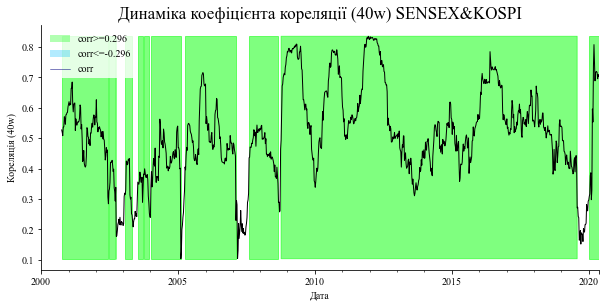

In [15]:
name=['SENSEX.csv','HANGSENG.csv','NIKKEI.csv','KOSPI.csv']
correlation(name)

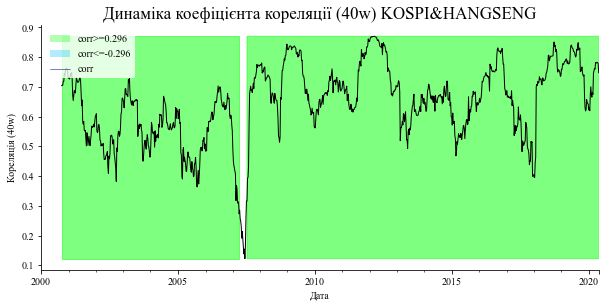

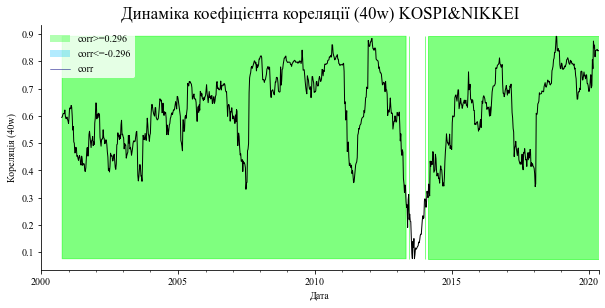

In [16]:
name=['KOSPI.csv','HANGSENG.csv','NIKKEI.csv']
correlation(name)

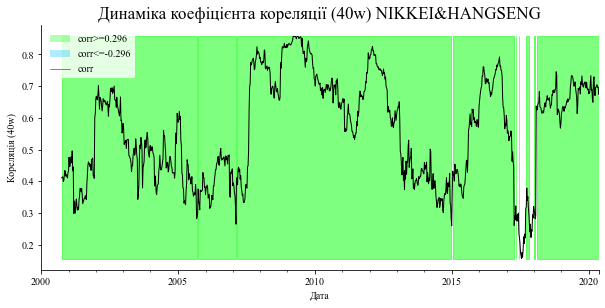

In [17]:
name=['NIKKEI.csv','HANGSENG.csv']
correlation(name)